In [1]:
# Import the dependencies

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats,lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

14.11914498543733 -170.71424478464147
-66.93458596306498 105.20482152820767
63.514989640584616 -145.86028417198216
-72.09338394003657 150.55540990110768
-29.7507525938665 62.670844702271495
27.59177287720395 68.2932484654045
-45.65569514786724 58.76165094001442
81.54335676776336 -110.18637469958223
26.541353548076387 -137.38423325844207
-55.80948877288995 -31.302525116601743
67.1573204167494 145.46287914413938
-81.87076959459037 103.79392677814621
35.834443527813676 54.13140550965332
66.53250717992285 -116.93692195936514
21.968321209627447 119.6124774637023
-48.36255973452174 1.9606425398277452
37.70419419243932 -6.362280404784826
89.91676832209035 130.01172031993406
-3.9667693844717604 -59.27883032872056
-1.8395038406728617 -177.04521905750616
29.62965080507597 -6.617065041442004
-12.97477686639374 145.59371170242258
76.31960874139011 100.98645689684645
61.53535969253454 39.824151287537234
32.23498346053198 136.61470771323337
44.48747686964924 -23.316297773130174
66.25551303014211 -25

-85.18836993579129 -90.0800235325848
-49.38465204133179 -82.33090553091589
-79.26498125265601 131.37247624301267
-37.478971444012956 155.09765858149274
74.67676653702807 -164.68958190023736
-74.08332672961575 9.49423467280019
47.77093234996201 -29.66551116065625
58.53313893503605 172.2236606234502
-37.947336766069945 32.18332173613831
-77.95478488519618 -86.86454169088898
-39.60571480696117 112.51771176465257
-35.2346683304659 162.23170411993306
37.83831359094076 -68.29686981794345
61.390297546896875 -129.66037223033578
89.81615288168129 72.16603918121132
8.732864067220547 -71.55335925231466
35.23498547150393 -74.39326655930674
-86.73817628405682 55.52146340838817
84.6889747788029 100.01142618889361


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities

cities = []

# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count

len(cities)

621

In [7]:
# Import the requests library

import requests

# Import the API key

from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

In [10]:
# Create an empty list to hold the weather data

city_data = []

# Print the beginning of the logging

print("Beginning Data Retrieval")
print("----------------------------")

# Create counters

record_count = 1

set_count = 1

# Loop through all the cities in the list

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    
    if(i % 50 == 0 and i >= 50):
        
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    
    record_count += 1
    
# Run API request for each of the cities

    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city
    except:
        
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete

print("------------------")

print("Data Retrieval Complete")

print("------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | fairbanks
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | larkana
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | pacific grove
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | belaya gora
Processing Record 12 of Set 1 | damghan
Processing Record 13 of Set 1 | kaohsiung
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | sanlucar la mayor
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | nova olinda do norte
Processing Record 18 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 1 | tarudant
City not found. Skipping...
Processing Record 20 of Set 1 | port moresby
Processing Record 21 of Set 

Processing Record 40 of Set 4 | yar-sale
Processing Record 41 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 42 of Set 4 | upernavik
Processing Record 43 of Set 4 | hamilton
Processing Record 44 of Set 4 | charters towers
Processing Record 45 of Set 4 | port hedland
Processing Record 46 of Set 4 | pinotepa nacional
Processing Record 47 of Set 4 | canton
Processing Record 48 of Set 4 | caconda
Processing Record 49 of Set 4 | hearst
Processing Record 50 of Set 4 | nalut
Processing Record 1 of Set 5 | kendari
Processing Record 2 of Set 5 | port-cartier
Processing Record 3 of Set 5 | kadykchan
City not found. Skipping...
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | sompeta
Processing Record 6 of Set 5 | draguignan
Processing Record 7 of Set 5 | kattivakkam
Processing Record 8 of Set 5 | skibbereen
Processing Record 9 of Set 5 | huarmey
Processing Record 10 of Set 5 | kavieng
Processing Record 11 of Set 5 | shenzhen
Processing Record 12 of Set

Processing Record 26 of Set 8 | ubatuba
Processing Record 27 of Set 8 | havelock
Processing Record 28 of Set 8 | faranah
Processing Record 29 of Set 8 | whangamata
Processing Record 30 of Set 8 | camacha
Processing Record 31 of Set 8 | lavrentiya
Processing Record 32 of Set 8 | hobyo
Processing Record 33 of Set 8 | barawe
City not found. Skipping...
Processing Record 34 of Set 8 | pauini
Processing Record 35 of Set 8 | synya
Processing Record 36 of Set 8 | jiddah
City not found. Skipping...
Processing Record 37 of Set 8 | west bay
Processing Record 38 of Set 8 | gillette
Processing Record 39 of Set 8 | kirakira
Processing Record 40 of Set 8 | talnakh
Processing Record 41 of Set 8 | juneau
Processing Record 42 of Set 8 | kano
Processing Record 43 of Set 8 | tokmak
Processing Record 44 of Set 8 | ouahigouya
Processing Record 45 of Set 8 | hjelset
Processing Record 46 of Set 8 | iquique
Processing Record 47 of Set 8 | makakilo city
Processing Record 48 of Set 8 | vao
Processing Record 49 

Processing Record 16 of Set 12 | monte alegre
Processing Record 17 of Set 12 | pangoa
Processing Record 18 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 19 of Set 12 | foumban
Processing Record 20 of Set 12 | dondo
Processing Record 21 of Set 12 | belmonte
Processing Record 22 of Set 12 | xuzhou
Processing Record 23 of Set 12 | gornopravdinsk
Processing Record 24 of Set 12 | hunza
City not found. Skipping...
Processing Record 25 of Set 12 | grindavik
Processing Record 26 of Set 12 | nata
Processing Record 27 of Set 12 | patacamaya
Processing Record 28 of Set 12 | ayan
Processing Record 29 of Set 12 | yarim
Processing Record 30 of Set 12 | fort morgan
Processing Record 31 of Set 12 | celestun
Processing Record 32 of Set 12 | murud
Processing Record 33 of Set 12 | shakiso
Processing Record 34 of Set 12 | danjiangkou
Processing Record 35 of Set 12 | comodoro rivadavia
Processing Record 36 of Set 12 | hendijan
City not found. Skipping...
Processing Record 37 of Set 12 

In [11]:
len(city_data)

569

In [12]:
city_data_df = pd.DataFrame(city_data)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,85.48,69,20,8.05,US,2022-09-16 22:10:16
1,Albany,42.6001,-73.9662,66.16,66,67,7.61,US,2022-09-16 22:06:40
2,Fairbanks,64.8378,-147.7164,57.60,68,75,5.75,US,2022-09-16 22:10:17
3,Hobart,-42.8794,147.3294,52.05,84,20,4.00,AU,2022-09-16 22:07:47
4,Souillac,-20.5167,57.5167,70.18,83,40,12.66,MU,2022-09-16 22:10:18


In [13]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

new_city_data_df = city_data_df[column_order]

In [14]:
new_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-09-16 22:10:16,22.0752,-159.3190,85.48,69,20,8.05
1,Albany,US,2022-09-16 22:06:40,42.6001,-73.9662,66.16,66,67,7.61
2,Fairbanks,US,2022-09-16 22:10:17,64.8378,-147.7164,57.60,68,75,5.75
3,Hobart,AU,2022-09-16 22:07:47,-42.8794,147.3294,52.05,84,20,4.00
4,Souillac,MU,2022-09-16 22:10:18,-20.5167,57.5167,70.18,83,40,12.66
...,...,...,...,...,...,...,...,...,...
564,Ulladulla,AU,2022-09-16 22:26:01,-35.3500,150.4667,55.76,60,2,10.18
565,Port Macquarie,AU,2022-09-16 22:26:02,-31.4333,152.9167,66.88,58,100,8.19
566,Nantucket,US,2022-09-16 22:26:03,41.2835,-70.0995,69.91,49,0,9.22
567,El Vigia,VE,2022-09-16 22:26:03,8.6219,-71.6506,84.06,75,100,2.80


In [15]:
# Create the output file (CSV)

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields form the DataFrame for plotting

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

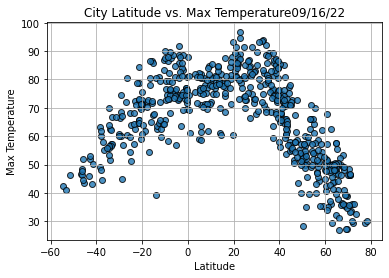

In [18]:
# Import time module

# Build the scatter plot for latitude vs. max temperature

plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8, label= "Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))

plt.ylabel("Max Temperature")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# Show plot

plt.show()

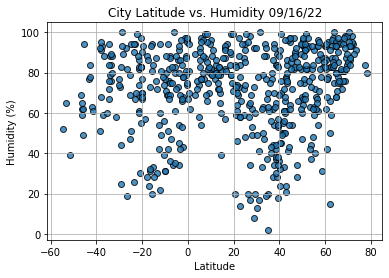

In [19]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig2.png")

# Show plot

plt.show()

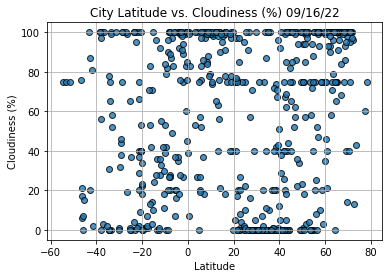

In [20]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig3.png")

# Show plot

plt.show()

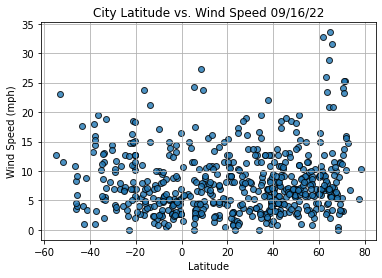

In [21]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig4.png")

# Show plot

plt.show()

In [31]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()
    

In [32]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

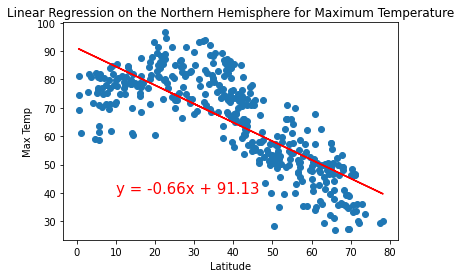

In [33]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

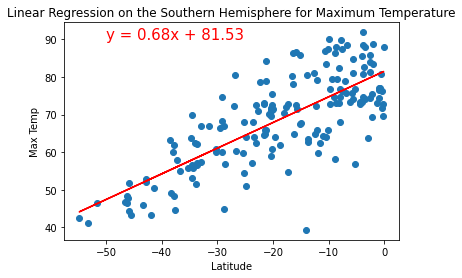

In [34]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

# Call the function

plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

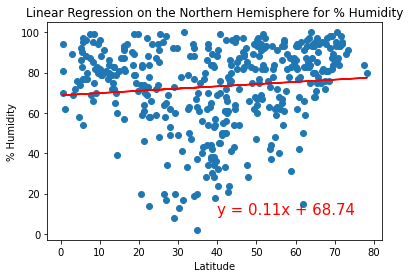

In [50]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

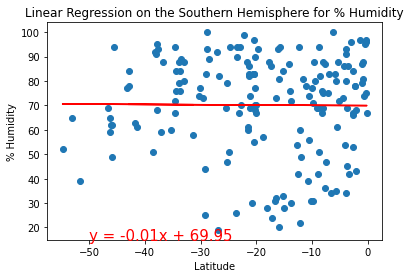

In [49]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

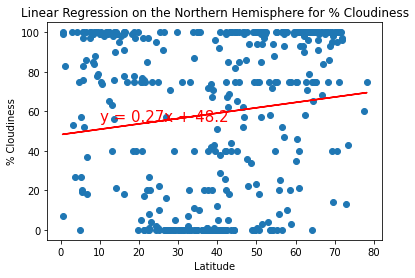

In [48]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

# Call the function

plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,55))

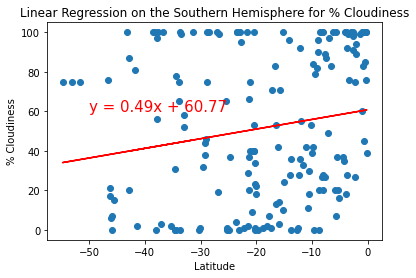

In [47]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

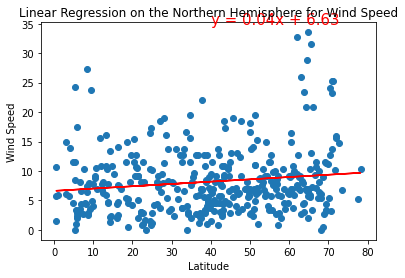

In [51]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

# Call the function

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

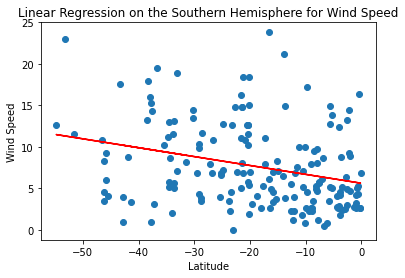

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))